# **Car Price Prediction using Linear Regression**

## Using Linear Regression (Ordinary Least Square) to predict car price


# **Understanding about Dataset**

## **In total, there are 9 variables in the dataset**

1. **Brand** - manufacturing company
2. **Model** - model of cars
3. **Year** - year of manufacturing
4. **Selling_Price** - SP of car
5. **KM_Driven** - total km driven
6. **Fuel** - type of fuel used in car
7. **Seller_Type** - type of seller
8. **Transmission** - type of transmission in car
9. **Owner** - whether current owner is the first owner or repurchased


# **Import Library**

In [ ]:
import pandas as pd


In [ ]:
import numpy as np

# **Import CSV as DataFrame**

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Car%20Price.csv')

# **Analyzing the data**

# **Displaying the first 5 rows of DataFrame**

In [ ]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# **Detailed Information of DataFrame**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


# **Getting the Summary Statistics**

In [ ]:
df.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# **Displaying Categories and there count**

## **1. Brand**

In [ ]:
df[['Brand']].value_counts()

Brand        
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Ambassador          4
Volvo               4
Jeep                3
OpelCorsa           2
MG                  2
Isuzu               1
Force               1
Daewoo              1
Kia                 1
dtype: int64

## **2. Model**

In [ ]:
df[['Model']].value_counts()

Model                               
Maruti Swift Dzire VDI                  69
Maruti Alto 800 LXI                     59
Maruti Alto LXi                         47
Hyundai EON Era Plus                    35
Maruti Alto LX                          35
                                        ..
Mahindra KUV 100 G80 K4 Plus             1
Mahindra KUV 100 mFALCON D75 K8          1
Mahindra KUV 100 mFALCON D75 K8 AW       1
Mahindra KUV 100 mFALCON G80 K2 Plus     1
Volvo XC60 D5 Inscription                1
Length: 1491, dtype: int64

## **3. Fuel**

In [ ]:
df[['Fuel']].value_counts()

Fuel    
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
dtype: int64

## **4. Type of Seller**

In [ ]:
df[['Seller_Type']].value_counts()

Seller_Type     
Individual          3244
Dealer               994
Trustmark Dealer     102
dtype: int64

## **5. Transmission**

In [ ]:
df[['Transmission']].value_counts()

Transmission
Manual          3892
Automatic        448
dtype: int64

## **6. Owner**

In [ ]:
df[['Owner']].value_counts()

Owner               
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
dtype: int64

# **Column Names**

In [ ]:
df.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# **Shape of DataFrame - displays total no. of rows and cols**

In [ ]:
df.shape

(4340, 9)

# **Data Encoding**

In [ ]:
df.replace({'Fuel' : {'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2, 'LPG' : 3, 'Electric' : 4 }}, inplace = True)

In [ ]:
df.replace({'Seller_Type' : {'Individual' : 0, 'Dealer' : 1, 'Trustmark Dealer' : 2}}, inplace = True)

In [ ]:
df.replace({'Transmission' : {'Manual' : 0, 'Automatic' : 1}}, inplace = True)

In [ ]:
df.replace({'Owner' : {'First Owner' : 0, 'Second Owner' : 1, 'Third Owner' : 2, 'Fourth & Above Owner' : 3, 'Test Drive Car' : 4 }}, inplace = True)

# **Define X and Y**

## **X - (Features or Independent or Attribute Variable)**
## **Y - (Label or Dependent or Target Variable)**

In [ ]:
X = df[['Year','KM_Driven', 'Fuel','Seller_Type', 'Transmission', 'Owner']]

In [ ]:
X.shape

(4340, 6)

In [ ]:
X

,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1
...,...,...,...,...,...,...
4335,2014,80000,1,0,0,1
4336,2014,80000,1,0,0,1
4337,2009,83000,0,0,0,1
4338,2016,90000,1,0,0,0


In [ ]:
y = df[['Selling_Price']]

In [ ]:
y.shape

(4340, 1)

In [ ]:
y

,Selling_Price
0,60000
1,135000
2,600000
3,250000
4,450000
...,...
4335,409999
4336,409999
4337,110000
4338,865000


# **Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 202529)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3038, 6), (1302, 6), (3038, 1), (1302, 1))

# **Train the Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

# **Model Prediction**

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred.shape

(1302, 1)

In [ ]:
y_pred

array([[ 472072.27222236],
       [1475582.68101846],
       [ 845011.04067855],
       ...,
       [ 568923.0402934 ],
       [ 550759.4697942 ],
       [1736412.6523827 ]])

# **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_test, y_pred)

177598887068.27036

In [ ]:
mean_absolute_error(y_test, y_pred)

235237.49968647672

In [ ]:
r2_score(y_test, y_pred)

0.4480291896739884

# **Visualization of Actual vs Predicted Results**

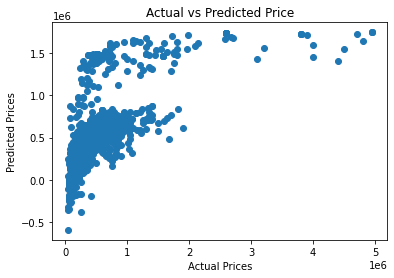

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.title('Actual vs Predicted Price')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# **Future Predictions**

## *Lets select a random sample from the existing dataset as a new value*

### Steps to Follow

1. Extract a random row using **sample function**
2. Separate X and Y
3. Predict

In [ ]:
df_new = df.sample(1)

In [ ]:
df_new

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
1279,Ford,Ford Figo Diesel EXI,2014,285000,68293,1,1,0,1


In [ ]:
df_new.shape

(1, 9)

In [ ]:
X_new = df_new[['Year','KM_Driven', 'Fuel','Seller_Type', 'Transmission', 'Owner']]

In [ ]:
y_pred_new = lr.predict(X_new)

In [ ]:
y_pred_new

array([[593403.93743247]])